In [35]:
import subprocess
import sys

import warnings
warnings.filterwarnings("ignore")

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--upgrade", "--no-cache-dir"])
# install_package("yfinance")
# install_package("yahoo_fin")

import time
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
import yfinance as yf

In [89]:
'''
These are the 15 biggest stocks (in terms of market cap) for chosen sectors: 

'Technology' : ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOG', 'META', 'TSM', 'TSLA', 'AVGO', 'ASML', 
        '005930.KS', 'TCEHY', 'ORCL', 'AMD', 'CRM']
        
'Financial Services' : ['BRK-B', 'V', 'JPM', 'MA', 'BAC', '1398.HK', '601288.SS', 'WFC', '601988.SS', '601939.SS', 'AXP', 
        'HSBC', 'MS', 'RY', 'GS']

'Consumer Discretionary' : ['TSLA', 'WMT', 'HD', 'COST', 'MCD', 'BABA', 'NIKE', 'IDEXY', 'LOW', 'UL', 'BKNG', 
        'TJX', 'SBUX', 'ABNB', 'LULU']
        
'Industrials' : ['GE', 'CAT', 'UNP', 'SIEGY', 'HON', SBGSF', 'UPS', 'EADSF', 'BA', 'RTX', 'ETN', 'ADP', 'LMT',
        'MTSUY', 'SAFRY']


'''


ticker_dict = {
    'Technology' : ['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOG', 'META', 'TSM', 'TSLA', 
                    'AVGO', 'ASML', '005930.KS', 'TCEHY', 'ORCL', 'AMD', 'CRM'],
    'Financial Services' : ['BRK-B', 'V', 'JPM', 'MA', 'BAC', '1398.HK', '601288.SS', 'WFC', 
                            '601988.SS', '601939.SS', 'AXP', 'HSBC', 'MS', 'RY', 'GS'],
    'Consumer Discretionary' : ['MC.PA','NFLX', 'WMT', 'HD', 'COST', 'MCD', 'BABA', 'NKE', 'IDEXY', 
                                'LOW', 'UL', 'BKNG', 'TJX', 'SBUX', 'LULU'],
    'Industrials' : ['GE', 'CAT', 'UNP', 'SIEGY', 'HON', 'SBGSF', 'UPS', 'EADSF', 'BA', 
                     'RTX', 'ETN', 'ADP', 'LMT','DE', 'SAF.PA']
}

count = 0 
for ticker_categ in ticker_dict.keys(): 
    for ticker in ticker_dict[ticker_categ]:
        count += 1
print(f'There are {count} tickers.')

ticker_lst = []
for ticker_categ in ticker_dict.keys(): 
    for ticker in ticker_dict[ticker_categ]:
        ticker_lst.append(ticker)
print(len(ticker_lst))


'''
DEFINING KEY VARIABLES
'''
start_date = '2015-01-01'
# end_date = datetime.now().strftime("%Y-%m-%d")
end_date = '2024-02-15' #for simplification to ensure datasets are consistent in size

There are 60 tickers.
60


In [90]:
''' UTIL FUNCTIONS '''

# def get_logreturn(df, ticker_name): 
    
#     date_column = df.columns[0]
#     price_column = df.columns[1]
    
#     df = df.sort_values(by = date_column)
    
#     title = ticker_name + 'log_return'
#     df[title] = np.log(df[price_column] / df[price_column].shift(1))
    
#     return df


def get_logreturn(df_price_col):
    return np.log(df_price_col / df_price_col.shift(1)) * 100 

def minmax_scaler(df, spread = 1):
    min_df = df.min()
    max_df = df.max() 
    
    df = df.apply(lambda x : ((x-min_df) / (max_df - min_df)) / spread)
    
    return df 

In [91]:
'''DOWNLOADING THE DATASETS'''

'''
Define a dictionary with the following structure: 

main_dic = {
    Ticker : Dataframe
}
'''

main_dict = {}

count_2 = 0
for ticker_categ in ticker_dict.keys(): 
#     print(f'Category: {ticker_categ}')
#     time.sleep(1)
    for ticker in ticker_dict[ticker_categ]:
        temp_df = pd.DataFrame()
        temp_df = yf.download(ticker, start=start_date, end=end_date)
#         print(f'Dataset for ticker {ticker} has been successfully downloaded. \nLength of dataset is: {len(temp_df)}')
#         time.sleep(1)
        
        #FEATURE ENGINEERING
        date_column = temp_df.index
        temp_df = temp_df.sort_index()
        
        #Daily price normalized to the total volume of the dataset
        temp_df['price_volume'] = temp_df['Close'] * temp_df['Volume']
        temp_df['Norm_PV'] = (temp_df['price_volume'] / temp_df['Volume'].sum()) #Norm_PV = Normalized Price Volume

        #Renaming (for merging purposes):
        title_1 = ticker + ': Close'
        title_2 = ticker + ': Norm_PV'
        title_3 = ticker + ': Log-Returns'
        
        #Log-returns
        temp_df[title_3] = get_logreturn(temp_df['Close']) #Results are in %
        temp_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'price_volume'], axis = 1, inplace = True)
        
        temp_df.rename(columns={'Close': title_1,
                                'Norm_PV': title_2,
                               }, inplace=True)

        main_dict[ticker] = temp_df
        count_2 += 1
#     print()

assert count == count_2

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [92]:
print(len(ticker_lst))
print(len(main_dict.keys()))

60
60


In [93]:
main_dict['JPM'].columns
main_dict['JPM'].index

# main_dict['AAPL']['AAPL: Norm_PV']
# main_dict['AAPL']['AAPL: Log-Returns']    
# main_dict['LQD']['LQD: Log-Returns']

# for k, v in main_dict.items(): 
#     try : 
        
#         print(main_dict[k].loc['2019-01-09', main_dict[k].columns[1]])
#     except KeyError as err: 
#         print(f'Error for {k}')
        

# print(main_dict.keys())

set_main = set(main_dict.keys())
set_lst = set(ticker_lst)

# assert len(set_main) == len(set_lst)
# assert len(main_dict.keys()) == len(ticker_lst)

# not_in_common = set_main ^ set_lst
# not_in_common = set_main.symmetric_difference(set_lst)
# print(not_in_common)

not_in_common = set_lst - set_main
not_in_common =  set_main - set_lst
print(not_in_common)


# Convert lists to sets
set1 = set(main_dict.keys())
set2 = set(ticker_lst)

# Find differences
difference_in_list1 = list(set1 - set2)  # Elements in list1 not in list2
difference_in_list2 = list(set2 - set1)  # Elements in list2 not in list1

print("Elements in list1 but not in list2:", difference_in_list1)
print("Elements in list2 but not in list1:", difference_in_list2)


set()
Elements in list1 but not in list2: []
Elements in list2 but not in list1: []


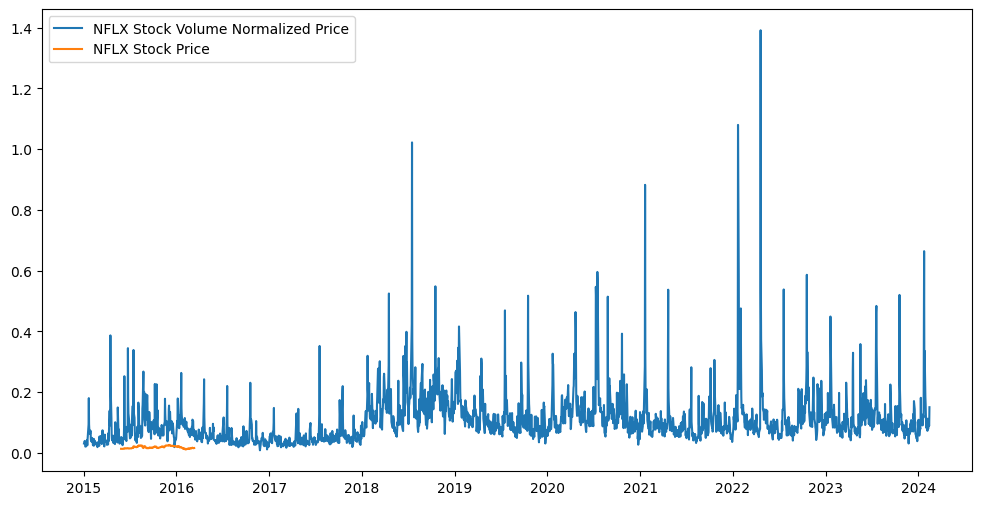

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(main_dict['NFLX']['NFLX: Norm_PV'][:], label= 'NFLX Stock Volume Normalized Price')
plt.plot(minmax_scaler(main_dict['NFLX']['NFLX: Close'], spread = 5)[100:300], label= 'NFLX Stock Price')
plt.legend()
plt.show()


In [95]:
print(len(main_dict))

60


In [97]:
'''
Now, a key part is to merge all our little dataframes in a way that we have the same number of observations.

'''

df_list = []

for k, v in main_dict.items():
    df_list.append(v)
    
assert count == (len(df_list))

merged_df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='inner'), df_list)

merged_df.head(10)

merged_df.describe()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2038 entries, 2015-01-05 to 2024-02-08
Columns: 180 entries, MSFT: Close to SAF.PA: Log-Returns
dtypes: float64(180)
memory usage: 2.8 MB


In [ ]:
merged_df.to_excel('merged_df_sectorial.xlsx', index=False)
merged_df.to_csv('merged_df_sectorial.csv', index = False)